# Integration basics playbook

### 1. `scipy` `quad` basics

To integrate we use `scipy.integrate`.  Consider the following integral:

$ {I}(a,b) = \int_{0}^{1} ax^2 + b\,dx. $


In [1]:
from scipy.integrate import quad

def integrand(x, a, b):
    return a*x**2 + b

a = 2
b = 1
I = quad(integrand, 0, 1, args=(a,b))
I

(1.6666666666666667, 1.8503717077085944e-14)

We can also integrate to infinity.  Consider this integral:

$ E_{n}(x) = \int_{1}^{\infty} \frac{e^{-xt}}{t^{n}} \, dx$

In [2]:
import numpy as np

def integrand(t, n, x):
    return np.exp(-x*t) / t**n

def expint(n, x):
    return quad(integrand, 1, np.inf, args=(n, x))[0]

# The vectorized function vec_expint evaluates expint over successive tuples of input_array
vec_expint = np.vectorize(expint)

input_array = np.arange(1.0, 4.0, 1.0)
print(input_array)
vec_expint(3, input_array)

[1. 2. 3.]


array([0.10969197, 0.03013338, 0.00893065])

### 2. The AS problem

A velocity time graph shown below has motion given by the following equations:

$v = 2 t^2 - 3t -t^3/3, \quad 0 \leq t \leq 4 $

$v = 1.5 t + c, \quad \quad \quad \quad t \geq 4$

The particle returns to its starting position at time ${T}$. Find the velocity of the particle at ${T}$. 

Let's draw the graph:

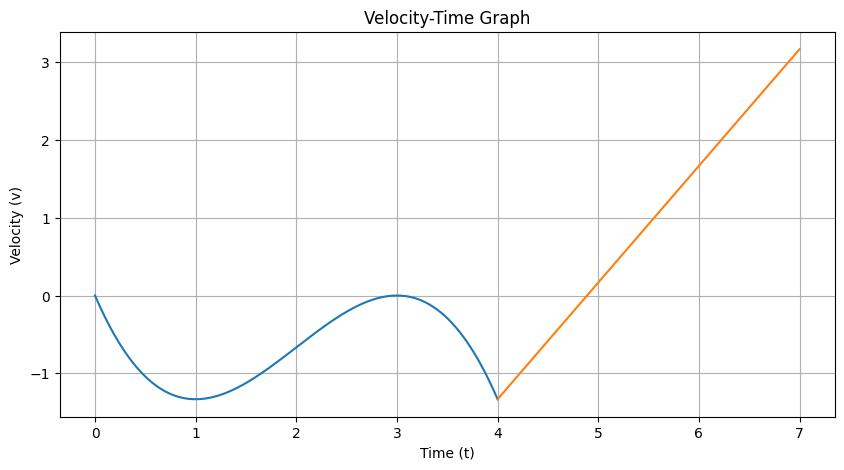

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Define the time values and velocity function
t1 = np.linspace(0, 4, 500)
v1 = 2*t1**2 - 3*t1 - t1**3/3
# Define the time values and velocity function
t2 = np.linspace(4, 7, 200)
v2 = 1.5*t2 - 22/3

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(t1, v1)
plt.plot(t2, v2)

# Define the labels and title
plt.xlabel('Time (t)')
plt.ylabel('Velocity (v)')
plt.title('Velocity-Time Graph')

# Show the plot
plt.grid(True)

Let's create our two velocity graphs.  We know that $v1$ equals $v2$ at $t=4$ so let's plug in $t=4$ and see what $s$ it gives us:

In [4]:
from scipy.integrate import quad

def v1(t):
    return 2*t**2 - 3*t - (1/3)*t**3

def v2(t, c):
    return 1.5*t + c

print(v1(4))

-1.3333333333333321


This then gives us our value of $c$ by plugging $t=4$ into $v2$.  We know that $-1.333 = 1.5 * 4 + c$.  Therefore $c= -7.3333$ or $-22/3$

We can now calculate the **integral** of these two functions using `scipy` `quad` as in the first section above.  This gives us the corresponding **displacement** (area under the curve).  Let's do that with $v1$ from 0 to 4 and $v2$ from 4 to 5.  Note both values are negative as expected because $v2$ only starts generating positive area under the curve after $t=5$:

In [5]:
I1 = quad(v1, 0, 4, args=())[0]
c = -22/3
I2 = quad(v2, 4, 5, args=(c))[0]
print(I1)
print(I2)

-2.666666666666664
-0.583333333333333


To answer our question, we need to find the time $T$ where the integral of $v2$ yields +8/3 as the area under the graph to cancel out the -8/3 created by the integral of $v1$.  Let's create two functions that generate these integral values directly using the actual integration functions instead of `scipy`.  Let's check they are giving us the same value as the previous `I1` and `I2`:

In [6]:
def I1(t1,t2):
    return ((2/3)*t2**3 - (3/2)*t2**2 - (t2**4)/12) - ((2/3)*t1**3 - (3/2)*t1**2 - (t1**4)/12)

def I2(t1, t2, c):
    return ((3/4)*t2**2 + c*t2) - ((3/4)*t1**2 + c*t1)

print(I1(0,4))
print(I2(4,5,c))

-2.666666666666668
-0.5833333333333321


We basically want to solve the following equation for $T$:

$ {I}(4,T) = \int_{4}^{T} 3t/2 + c\,dx = 8/3 $


In other words, after integration of `v2`:

$ 3T^2/4 + cT - (-52/3) = 8/3$ where $c = -22/3 $

Or multiplying both sides by 12: $9T^2 -88T -32 +208 = 0$

Or: $9T^2 -88T +176 = 0$

And we can plug that into `numpy` to find our $T$ using from our quadratic solutions:

In [7]:
import numpy as np
coeff = [9,-88,176]
np.roots(coeff)

array([6.97351812, 2.80425966])

Our answer for $T$ is the root that lies above 4 so 6.97351812 and we can plug that back into `I2` to check:

In [8]:
print(I2(4,6.97351812,c))

2.6666666808095805


So the solution is $T = 6.97351812$